In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('train_preprocess.tsv.txt',sep='\t', error_bad_lines=False, header=None)
df.head()

C:\Users\jazmi\AppData\Local\Temp\ipykernel_16464\1886145706.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('train_preprocess.tsv.txt',sep='\t', error_bad_lines=False, header=None)


,0,1
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [6]:
df.rename(columns = {1:'label',0:'text'}, inplace=True)
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [7]:
df.label.value_counts()

positive    6416
negative    3436
neutral     1148
Name: label, dtype: int64

In [ ]:
def cut_sentimen(dt):
    dt = dt.groupby('label').head(min(dt['label'].value_counts()))
    dt = dt.reset_index()
    dt = dt[['text','label']]
    return dt

df = cut_sentimen(df)

In [8]:
df

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [7]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

In [8]:
import re
def cleansing(text):
    text = re.sub('[^A-Za-z0-9]',' ',text)
    text = re.sub('( ){2,13}',' ',text)
    return text

def stemming(text):
    text = stemmer.stem(text)
    return text

In [5]:
df['text_clean'] = df.text.apply(cleansing)
df['stemming'] = df.text_clean.apply(stemming)
df.head()

NameError: name 'df' is not defined

In [ ]:
!pip install nlp-id
from nlp_id.lemmatizer import Lemmatizer

In [ ]:
def bersihkan(text):
  text = text.lower()
  text = re.sub('(user)','',text)
  text = re.sub('(rt)','',text)
  text = re.sub('(url)','',text)
  text = re.sub(r"https://t.co/\w+"," ",text)
  text = re.sub(r"\\n","",text)
  text = re.sub("\n","",text)
  text = re.sub(r"\\x.."," ",text)
  text = re.sub(r"#\w+","",text)
  text = re.sub("\W"," ",text)
  text = re.sub("( ){2,15}"," ",text)
  return text

def lemas(text):
    text = lema.lemmatize(text)
    return text

In [ ]:
df['text_clean_new'] = df.text.apply(bersihkan)
df['lemas2'] = df.text_clean_new.apply(lemas)
df

In [ ]:
import re
lema = Lemmatizer()
def cleansing(text):
  text = text.lower()
  text = re.sub(r'[^A-Za-z0-9]',' ',text)
  text = re.sub('( ){12}',' ',text)
  return text

def lemas(text):
    text = lema.lemmatize(text)
    return text

df['text_clean'] = df.text.apply(cleansing)
df['lemas'] = df.text_clean.apply(lemas)
df

In [ ]:
import re
lema = Lemmatizer()
def cleansing(text):
    text = text.lower()
    text = re.sub('\w+[0-9]\w+',' ',text)
    text = re.sub('__\w+__',' ',text)
    text = re.sub(r'[^A-Za-z0-9]',' ',text)
    text = re.sub('( ){2,10}',' ',text)
    return text

def lemas(text):
    text = lema.lemmatize(text)
    return text

df['text_clean'] = df.text.apply(cleansing)
df['lemas'] = df.text_clean.apply(lemas)
df

In [ ]:
for t in df.lemas:
  if 'laugh' in t:
    print(t)

In [ ]:
df.lemas.loc[df.lemas=='ini xl jaring nya jelek banget ya']

73    ini xl jaring nya jelek banget ya
Name: lemas, dtype: object

In [ ]:
df.label[73]

'negative'

In [ ]:
df.loc[1000]

text          pantesan saja anis baswedan diganti kerja nya ...
label                                                  negative
text_clean    pantesan saja anis baswedan diganti kerja nya ...
lemas         pantesan saja anis baswedan ganti kerja nya ti...
Name: 1000, dtype: object

In [ ]:
df.text.isnull().sum()

0

In [16]:
pos = df.loc[df['label'] == 'positive'].stemming.tolist()
neg = df.loc[df['label'] == 'negative'].stemming.tolist()
neu = df.loc[df['label'] == 'neutral'].stemming.tolist()

pos_label = df.loc[df['label'] == 'positive'].label.tolist()
neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()

In [17]:
total_data = pos + neg + neu
labels = pos_label + neg_label + neu_label

print("Pos: %s, Neg: %s, Neu: %s" % (len(pos), len(neg), len(neu)))
print("Total data: %s" % len(total_data))

Pos: 6416, Neg: 3436, Neu: 1148
Total data: 11000


FEATURE EXTRACTION

In [18]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer_2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer_2.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
print(vocab_size)
maxlen = max(len(x) for x in X)
print(maxlen)

X = pad_sequences(X)
print(X.shape)
with open('x_pad_sequences_2.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences_2.pickle has created!")

tokenizer_2.pickle has created!
13199
96
(11000, 96)
x_pad_sequences_2.pickle has created!


In [ ]:
X.shape

(3444, 85)

In [ ]:
df.tail()

,text,label,text_clean,lemas
3439,pkb benarkan charly setia band daftar jadi caw...,neutral,pkb benarkan charly setia band daftar jadi caw...,pkb benar charly setia band daftar jadi cawagu...
3440,pernah percaya kalau body lotion citra bikin b...,neutral,pernah percaya kalau body lotion citra bikin b...,pernah percaya kalau body lotion citra bikin b...
3441,bu susi marah menteri luhut perbolehkan kapal ...,neutral,bu susi marah menteri luhut perbolehkan kapal ...,bu sus marah menteri luhut boleh kapal asing c...
3442,f demokrat dorong upaya kemandirian energi nas...,neutral,f demokrat dorong upaya kemandirian energi nas...,f demokrat dorong upaya mandiri energi nasional
3443,hormati partai partai yang telah berkoalisi,neutral,hormati partai partai yang telah berkoalisi,hormat partai partai yang telah koalisi


In [19]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels_2.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels_2.pickle has created!")

y_labels_2.pickle has created!


In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K


PREPARE TRAIN AND TEST

In [20]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences_2.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels_2.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

TRAINING

In [21]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [22]:
embed_dim = 100
units = 64
adam = optimizers.Adam(learning_rate = 0.001)

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout = 0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer= adam, metrics = ['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 96, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10,042,435
Trainable params: 10,042,435
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
35/35 [==============================] - 11s 248ms/step - loss: 0.8452 - accuracy: 0.6319 - val_loss: 0.6418 - val_accuracy: 0.7859
Epoch 2/10
35/35 [==============================] - 7s 209ms/step - loss: 0.4977 - accuracy: 0.7994 - val_loss: 0.4516 - val_accuracy: 0.8168
Epoch 3/10
35/35 [

EVALUATION

In [23]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 2s 16ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       699
           1       0.83      0.71      0.77       219
           2       0.91      0.90      0.90      1282

    accuracy                           0.86      2200
   macro avg       0.85      0.82      0.83      2200
weighted avg       0.86      0.86      0.86      2200



VISUALIZATION

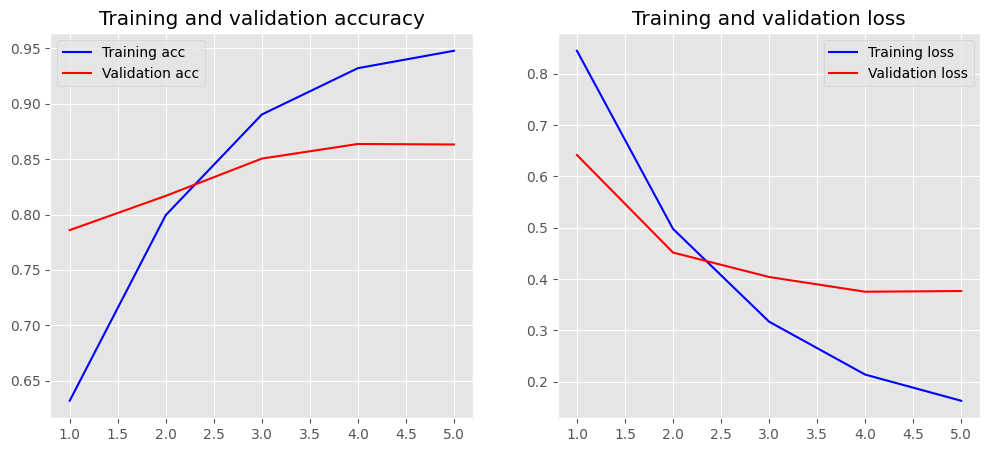

In [24]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [50]:
model.save('model_plat_sastrawi2.h5')
print("Model has created!")

Model has created!


PREDICT

In [12]:
import re
from keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

input_text = """
cantik
"""

# def cleansing(sent):
#     # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
#     string = sent.lower()
#     # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
#     string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
#     string = re.sub('( ){12}',' ',string)
#     return string


sentiment = ['negative','neutral','positive']

text = [cleansing(input_text)]
text = [stemming(text[0])]
print(text)

file = open("tokenizer_2.pickle",'rb')
tokenizer = pickle.load(file)
file.close()


file = open("x_pad_sequences_2.pickle",'rb')
X = pickle.load(file)
file.close()

predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model_plat_sastrawi2.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])
print(polarity)

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

['cantik']
1/1 [==============================] - 0s 475ms/step
2
Text:  cantik
Sentiment:  positive


In [ ]:
print(prediction)

[[5.5560069e-03 1.2187869e-04 9.9432206e-01]]
